<a href="https://colab.research.google.com/github/saranga0427/DataScience-Projects/blob/Learning-DS/Titanic_Survivals_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survival Predictions

##Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#tianic dataset
import pandas as pd

In [ ]:
data= pd.read_csv("drive/My Drive/Projects DS/titanic_train.csv")

##Data Cleaning and Preprocessing

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name seems to be not needed here. Pclass and Fare seem to be related. Missing values can be seen in cabin

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A lot of missing values in age. Mean and Median are different for quite a few features

In [ ]:
data.shape

(891, 12)

In [ ]:
cols = data.columns

In [ ]:
for col in cols:
  print(col, data[col].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#spliiting data into X and y
y = data['Survived']
X= data.drop('Survived', axis = 1)

In [ ]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 1)

In [ ]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [ ]:
#Preprocessing- whatever is applied for train has to be applied to trin before feeding the data to a model

In [ ]:
#missing value in age
X_train.Age = X_train.Age.fillna(X_train.Age.median())
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [ ]:
X_test.Age = X_test.Age.fillna(X_test.Age.median())

In [ ]:
import numpy as np
X_train.Embarked = X_train.Embarked.replace(np.nan, 'C')

In [ ]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

In [ ]:
#dropping the unwanted cols. cabin dropped due to missing values and unwanted
drop_cols = ['Name', 'PassengerId', 'Ticket','Cabin']

In [ ]:
X_train = X_train.drop(drop_cols, axis=1)

In [ ]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
X_train.shape

(712, 7)

In [ ]:
X_test = X_test.drop(drop_cols, axis=1)
X_test.shape

(179, 7)

In [ ]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [ ]:
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
#Object type so we need to handle these two
#no inherent ordering so onehot otherwise label/ordinal encoding
#for sex and embarked ordering doesn't matter

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OHE= OneHotEncoder(sparse = False)

In [ ]:
OHE_columns = OHE.fit_transform(X_train[['Sex', 'Embarked']]) 
#fit_transform expects df so double bracket
#numbers of cols generated by OHE are more hence can't directly apply to data, have to have different cols

In [ ]:
OHE_columns
#if sparse = false note given write OHE_columns.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
OHE_columns.shape

(712, 5)

In [ ]:
#cols to df
OHE_columns = pd.DataFrame(OHE_columns, columns = ['s1', 's2', 'e1', 'e2', 'e3'])
OHE_columns

,s1,s2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [ ]:
#concat
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
X_train[['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']]

,Pclass,Age,SibSp,Parch,Fare
301,3,29.0,2,0,23.2500
309,1,30.0,0,0,56.9292
516,2,34.0,0,0,10.5000
120,2,21.0,2,0,73.5000
570,2,62.0,0,0,10.5000
...,...,...,...,...,...
715,3,19.0,0,0,7.6500
767,3,30.5,0,0,7.7500
72,2,21.0,0,0,73.5000
235,3,29.0,0,0,7.5500


In [ ]:
#resetting indices for concat as we have performed some operations which has changed indices
X_train.reset_index(drop = True, inplace = True)
OHE_columns.reset_index(drop = True, inplace = True)

In [ ]:
X_train= pd.concat([X_train[['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']], OHE_columns], axis=1)

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
707,3,19.0,0,0,7.6500,0.0,1.0,0.0,0.0,1.0
708,3,30.5,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
709,2,21.0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
710,3,29.0,0,0,7.5500,1.0,0.0,0.0,0.0,1.0


In [ ]:
#same preprocessing in X_test

In [ ]:
OHE_columns_test = OHE.transform(X_test[['Sex', 'Embarked']]) 

In [ ]:
OHE_columns_test = pd.DataFrame(OHE_columns_test, columns = ['s1', 's2', 'e1', 'e2', 'e3'])
OHE_columns_test

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test.reset_index(drop = True, inplace = True)
OHE_columns_test.reset_index(drop = True, inplace = True)

In [ ]:
X_test= pd.concat([X_test[['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']], OHE_columns_test], axis=1)

In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,27.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,27.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,1,49.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
175,1,27.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
176,3,27.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
177,3,21.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test.shape

(179, 10)

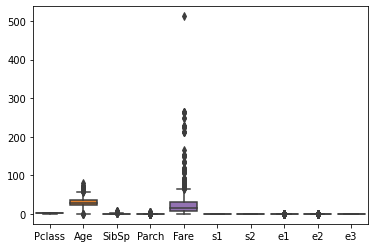

In [ ]:
#checking ranges of different features
import seaborn as sns
sns.boxplot(data = X_train)

In [ ]:
#Scaling as features have different ranges
from sklearn.preprocessing import StandardScaler

In [ ]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

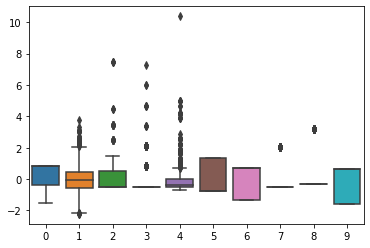

In [ ]:
sns.boxplot(data = X_train)

In [ ]:
#many outliers, can be reduced- try later with removal and compare. Output of SC is numpy array, to d more preprocessing in pd convertto df 

Modeling

In [ ]:
#importing all classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
#importing metrics- f1score and confusion matrix
from sklearn.metrics import f1_score, plot_confusion_matrix

In [ ]:
#creating objects
logreg= LogisticRegression()
sgd= SGDClassifier()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rfc= RandomForestClassifier()
gbc= GradientBoostingClassifier()

In [ ]:
#training the models
logreg.fit(X_train, y_train)
sgd.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#scores- accuracy
s1= logreg.score(X_test, y_test)
s2= sgd.score(X_test, y_test)
s3= svc.score(X_test, y_test)
s4= knn.score(X_test, y_test)
s5= dtc.score(X_test, y_test)
s6= rfc.score(X_test, y_test)
s7= gbc.score(X_test, y_test)

In [ ]:
scores = [s1,s2,s3,s4,s5,s6,s7]
scores

[0.7988826815642458,
 0.7821229050279329,
 0.776536312849162,
 0.7653631284916201,
 0.7597765363128491,
 0.7821229050279329,
 0.7877094972067039]

In [ ]:
#f1score
#y_pred
yp1= logreg.predict(X_test)
yp2= sgd.predict(X_test)
yp3= svc.predict(X_test)
yp4= knn.predict(X_test)
yp5= dtc.predict(X_test)
yp6= rfc.predict(X_test)
yp7= gbc.predict(X_test)

In [ ]:
fs1 = f1_score(y_test, yp1)
fs2 = f1_score(y_test, yp2)
fs3 = f1_score(y_test, yp3)
fs4 = f1_score(y_test, yp4)
fs5 = f1_score(y_test, yp5)
fs6 = f1_score(y_test, yp6)
fs7 = f1_score(y_test, yp7)

In [ ]:
f_scores = [fs1,fs2,fs3,fs4,fs5,fs6,fs7]
f_scores

[0.75,
 0.6976744186046512,
 0.6610169491525425,
 0.6666666666666667,
 0.6861313868613139,
 0.6976744186046512,
 0.6833333333333333]

In [ ]:
scores

[0.7988826815642458,
 0.7821229050279329,
 0.776536312849162,
 0.7653631284916201,
 0.7597765363128491,
 0.7821229050279329,
 0.7877094972067039]

In [ ]:
#we will select Logreg and RFC for tuning as they are top two bes tperforming ones

In [ ]:
#Get train scores and compare both to see underfitting and overfitting and tune the parameters for best models. try later 

Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver':['newton-cg', 'lbfgs', 'sag', 'saga']}

In [ ]:
GSCV = GridSearchCV(LogisticRegression(), param_grid= param_grid)

In [ ]:
GSCV.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [ ]:
GSCV.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [ ]:
GSCV.best_score_

0.8020092583472864

In [ ]:
#tune the other two and then build final model with the best of tuned models and then test it on other test data from kaggle(optional)